<a href="https://colab.research.google.com/github/sylviatobing/ujian/blob/main/uas_praktek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('police.csv')
data.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [ ]:
data.describe()

,county_name
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
data.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [ ]:
# Use search type to look at rows with 'Protective Frisk'
display(data['search_type'].value_counts())

# Since search type can have multiple values, containment need to be checked
data['frisk'] = data['search_type'].str.contains('Protective Frisk', na=False)

# Frisk condcuted by gender when vehicle was searched
display(data[(data['search_conducted'])].groupby('driver_gender')['frisk'].mean())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

In [ ]:
#Look at column data types
display(data.dtypes)

#Change is_arrested to boolean
display(data['is_arrested'].value_counts())
data['is_arrested'] = data['is_arrested'].astype('bool')

#Combine stop date and stop time to create pandas date time object
data['stop_datetime'] = pd.to_datetime(data['stop_date'].str.cat(data['stop_time'], sep=" "))

display(data.dtypes)

#Set datetime as index of dataframe
data.set_index('stop_datetime', inplace=True)

state                  object
stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
district               object
frisk                    bool
dtype: object

False    83461
True      3078
Name: is_arrested, dtype: int64

state                         object
stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
frisk                           bool
stop_datetime         datetime64[ns]
dtype: object

In [ ]:
data["stop_datetime"] = pd.to_datetime(data["stop_date"] + " " + data["stop_time"])
data["stop_datetime"]

0       2005-01-04 12:55:00
1       2005-01-23 23:15:00
2       2005-02-17 04:15:00
3       2005-02-20 17:15:00
4       2005-02-24 01:20:00
                ...        
91736   2015-12-31 21:21:00
91737   2015-12-31 21:59:00
91738   2015-12-31 22:04:00
91739   2015-12-31 22:09:00
91740   2015-12-31 22:47:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [ ]:
data = data.set_index("stop_datetime")
data.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [ ]:
data["hour"] = data["stop_time"].str.split(":", expand=True)[0]
data["hour"]

stop_datetime
2005-01-04 12:55:00    12
2005-01-23 23:15:00    23
2005-02-17 04:15:00    04
2005-02-20 17:15:00    17
2005-02-24 01:20:00    01
                       ..
2015-12-31 21:21:00    21
2015-12-31 21:59:00    21
2015-12-31 22:04:00    22
2015-12-31 22:09:00    22
2015-12-31 22:47:00    22
Name: hour, Length: 91741, dtype: object

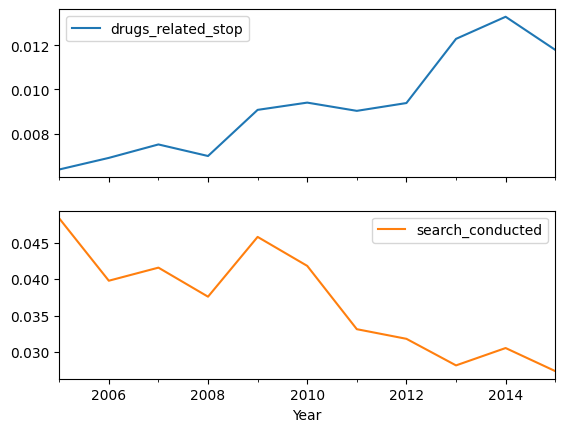

In [ ]:
annual_trend = data.resample('A')[['drugs_related_stop','search_conducted']].mean()
annual_trend.plot(subplots=True)
plt.xlabel("Year")
plt.show()

In [ ]:
# Create a frequency table of districts and violations
print(pd.crosstab(data.district,data.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(data.district,data.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

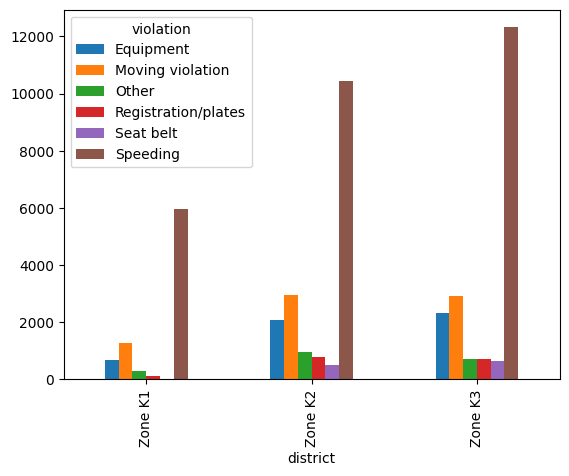

In [ ]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()


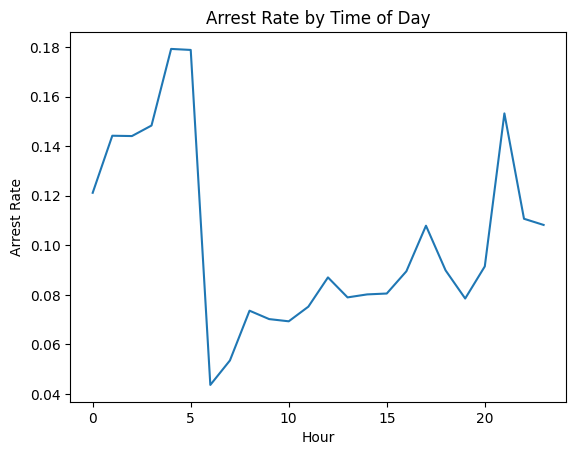

In [ ]:
# Overall Arrest Rate
overall_arrest_rate = data['is_arrested'].mean()

#Calculate hourly Arrest Rate. Resampling can also be used (used in next example)
hourly_arrest_rate = data.groupby(data.index.hour)['is_arrested'].mean()

# Plot Hourly Arrest Rate on a line chart
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

# Display the plot
plt.show()

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


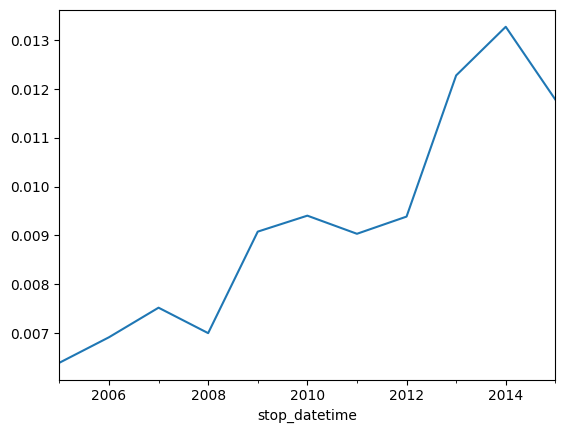

In [ ]:
# Calculate the annual rate of drug-related stops
print(data.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = data.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()